# Logistic Regression

Logistic Regression is a statistical method for predicting binary outcomes from data.

Examples of this are "yes" vs "no" or "young" vs "old". 

These are categories that translate to probability of being a 0 or a 1 

We can calculate logistic regression by adding an activation function as the final step to our linear model. 

This converts the linear regression output to a probability.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
filepath = "static/data/cervical_cancer.csv"
df = pd.read_csv(filepath)
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
df_nan = df.replace('?', np.nan)
df_nan.head(100)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3,23,2,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3,17,6,1,34,3.4,0,0,1,...,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1,26,3,0,0,0,1,2,1,...,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1,20,5,0,0,0,0,0,0,...,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3,15,NaN,1,1.266972909,2.8,0,0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


In [4]:
df_num = df_nan.convert_objects(convert_numeric=True)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             832 non-null float64
First sexual intercourse              851 non-null float64
Num of pregnancies                    802 non-null float64
Smokes                                845 non-null float64
Smokes (years)                        845 non-null float64
Smokes (packs/year)                   845 non-null float64
Hormonal Contraceptives               750 non-null float64
Hormonal Contraceptives (years)       750 non-null float64
IUD                                   741 non-null float64
IUD (years)                           741 non-null float64
STDs                                  753 non-null float64
STDs (number)                         753 non-null float64
STDs:condylomatosis                   753 non-null float64
STDs:cervical condylomatosis          753 non-null float64
STDs:vaginal

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [5]:
# for continuous variable
df_num['Number of sexual partners'] = df_num['Number of sexual partners'].fillna(df_num['Number of sexual partners'].median())
df_num['First sexual intercourse'] = df_num['First sexual intercourse'].fillna(df_num['First sexual intercourse'].median())
df_num['Num of pregnancies'] = df_num['Num of pregnancies'].fillna(df_num['Num of pregnancies'].median())
df_num['Smokes'] = df_num['Smokes'].fillna(1)
df_num['Smokes (years)'] = df_num['Smokes (years)'].fillna(df_num['Smokes (years)'].median())
df_num['Smokes (packs/year)'] = df_num['Smokes (packs/year)'].fillna(df_num['Smokes (packs/year)'].median())
df_num['Hormonal Contraceptives'] = df_num['Hormonal Contraceptives'].fillna(1)
df_num['Hormonal Contraceptives (years)'] = df_num['Hormonal Contraceptives (years)'].fillna(df_num['Hormonal Contraceptives (years)'].median())
df_num['IUD'] = df_num['IUD'].fillna(0) # Under suggestion
df_num['IUD (years)'] = df_num['IUD (years)'].fillna(0) #Under suggestion
df_num['STDs'] = df_num['STDs'].fillna(1)
df_num['STDs (number)'] = df_num['STDs (number)'].fillna(df_num['STDs (number)'].median())
df_num['STDs:condylomatosis'] = df_num['STDs:condylomatosis'].fillna(df_num['STDs:condylomatosis'].median())
df_num['STDs:cervical condylomatosis'] = df_num['STDs:cervical condylomatosis'].fillna(df_num['STDs:cervical condylomatosis'].median())
df_num['STDs:vaginal condylomatosis'] = df_num['STDs:vaginal condylomatosis'].fillna(df_num['STDs:vaginal condylomatosis'].median())
df_num['STDs:vulvo-perineal condylomatosis'] = df_num['STDs:vulvo-perineal condylomatosis'].fillna(df_num['STDs:vulvo-perineal condylomatosis'].median())
df_num['STDs:syphilis'] = df_num['STDs:syphilis'].fillna(df_num['STDs:syphilis'].median())
df_num['STDs:pelvic inflammatory disease'] = df_num['STDs:pelvic inflammatory disease'].fillna(df_num['STDs:pelvic inflammatory disease'].median())
df_num['STDs:genital herpes'] = df_num['STDs:genital herpes'].fillna(df_num['STDs:genital herpes'].median())
df_num['STDs:molluscum contagiosum'] = df_num['STDs:molluscum contagiosum'].fillna(df_num['STDs:molluscum contagiosum'].median())
df_num['STDs:AIDS'] = df_num['STDs:AIDS'].fillna(df_num['STDs:AIDS'].median())
df_num['STDs:HIV'] = df_num['STDs:HIV'].fillna(df_num['STDs:HIV'].median())
df_num['STDs:Hepatitis B'] = df_num['STDs:Hepatitis B'].fillna(df_num['STDs:Hepatitis B'].median())
df_num['STDs:HPV'] = df_num['STDs:HPV'].fillna(df_num['STDs:HPV'].median())
df_num['STDs: Time since first diagnosis'] = df_num['STDs: Time since first diagnosis'].fillna(df_num['STDs: Time since first diagnosis'].median())
df_num['STDs: Time since last diagnosis'] = df_num['STDs: Time since last diagnosis'].fillna(df_num['STDs: Time since last diagnosis'].median())

In [6]:
df = pd.get_dummies(data=df_num, columns=['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

In [7]:
df_num.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [8]:
df_num.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,0.158508,1.201241,0.446278,0.686480,2.035331,0.096737,...,4.177156,3.233100,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.644759,2.791883,1.400981,0.365430,4.060623,2.210351,0.464194,3.567040,0.295771,...,1.785156,1.818927,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df_num.to_csv("static/data/cervical_cancer_clean.csv", index=True)

In [10]:
df_num.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [14]:
json = df_num.to_json(orient="index")
json
                      
       #'Num of pregnancies': row[3], 'Smokes': row[4], 'Smokes (years)': row[5], 'Smokes (packs/year)': row[6],
       #'Hormonal Contraceptives': row[7], 'Hormonal Contraceptives (years)': row[8], 'IUD': row[9],
       #'IUD (years)':row[10], 'STDs':row[11]}
                      
#                      , 'STDs (number)', 'STDs:condylomatosis',
 #      'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
  #     'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
   #    'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
    #   'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
     #  'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
      # 'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       #'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       #'Citology', 'Biopsy'}

'{"0":{"Age":18,"Number of sexual partners":4.0,"First sexual intercourse":15.0,"Num of pregnancies":1.0,"Smokes":0.0,"Smokes (years)":0.0,"Smokes (packs\\/year)":0.0,"Hormonal Contraceptives":0.0,"Hormonal Contraceptives (years)":0.0,"IUD":0.0,"IUD (years)":0.0,"STDs":0.0,"STDs (number)":0.0,"STDs:condylomatosis":0.0,"STDs:cervical condylomatosis":0.0,"STDs:vaginal condylomatosis":0.0,"STDs:vulvo-perineal condylomatosis":0.0,"STDs:syphilis":0.0,"STDs:pelvic inflammatory disease":0.0,"STDs:genital herpes":0.0,"STDs:molluscum contagiosum":0.0,"STDs:AIDS":0.0,"STDs:HIV":0.0,"STDs:Hepatitis B":0.0,"STDs:HPV":0.0,"STDs: Number of diagnosis":0,"STDs: Time since first diagnosis":4.0,"STDs: Time since last diagnosis":3.0,"Dx:Cancer":0,"Dx:CIN":0,"Dx:HPV":0,"Dx":0,"Hinselmann":0,"Schiller":0,"Citology":0,"Biopsy":0},"1":{"Age":15,"Number of sexual partners":1.0,"First sexual intercourse":14.0,"Num of pregnancies":1.0,"Smokes":0.0,"Smokes (years)":0.0,"Smokes (packs\\/year)":0.0,"Hormonal Contr

Split our data into training and testing

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

Create a Logistic Regression Model

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Fit (train) or model using the training data

In [6]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Validate the model using the test data

In [7]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


Make predictions

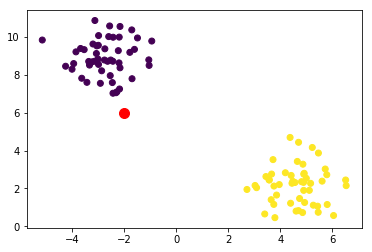

In [8]:
# Generate a new data point (the red circle)
import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [9]:
# Predict the class (purple or yellow) of the new data point
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [0]


In [10]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Actual,Prediction
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0
